# 6.6 Sourcing and Analyzing Time Data

## 00. Table of Contents

01. Importing Libraries
02. Importing Data
03. Subsetting, Wrangling, and Cleaning for Analysis
04. Time Series Analysis Decomposition
05. Testing for Stationarity
06. Stationarizing the Data

## 01. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## 02. Importing Data

In [2]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievment 6\01-2023 NPS Analysis'

In [6]:
df_nps_sums = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'nps_visitation_sums.csv'))
#sum of all nps facilities visitation and use for each month, aggregated with a pivot table in excel.

In [4]:
df_nps_sums.shape

(132, 15)

In [5]:
df_nps_sums.isnull().sum()

Year                                     0
Month                                    0
Date                                     0
Sum of Recreation Visits                 0
Sum of Non-Recreation Visits             0
Sum of Recreation Hours                  0
Sum of Non-Recreation Hours              0
Sum of Concessioner Lodging              0
Sum of Concessioner Camping              0
Sum of Tent Campers                      0
Sum of RV Campers                        0
Sum of Backcountry Campers               0
Sum of Non-Recreation Overnight Stays    0
Sum of Misc. Overnight Stays             0
Average of Monthly Avg Temp              0
dtype: int64

In [7]:
df_nps_sums_dups = df_nps_sums.duplicated()

In [9]:
df_nps_sums_dups.shape

(132,)

## 03. Subsetting, Wrangling, and Cleaning for Analysis

In [10]:
df_nps_sums.head()

,Year,Month,Date,Sum of Recreation Visits,Sum of Non-Recreation Visits,Sum of Recreation Hours,Sum of Non-Recreation Hours,Sum of Concessioner Lodging,Sum of Concessioner Camping,Sum of Tent Campers,Sum of RV Campers,Sum of Backcountry Campers,Sum of Non-Recreation Overnight Stays,Sum of Misc. Overnight Stays,Average of Monthly Avg Temp
0,2011,1,2011-1,9691617,9175456,35009959,9175456,63091,15088,45560,53159,32280,14584,35365,30.890029
1,2011,2,2011-2,10435433,8440598,37282208,8440598,63358,15436,47539,71262,39443,15393,32572,34.659531
2,2011,3,2011-3,14618146,10278768,55981169,10278768,120725,20940,121979,110858,89666,17435,62977,43.370088
3,2011,4,2011-4,18151482,9630433,76615638,9630433,182876,27486,172540,141918,109939,17539,108050,52.569208
4,2011,5,2011-5,22618205,10058026,104624699,10058026,266786,50752,255382,192637,187336,18545,182990,60.172727


In [21]:
df_sub = df_nps_sums.drop(columns = [
'Year',
'Month',
'Sum of Non-Recreation Visits',
'Sum of Recreation Hours',
'Sum of Non-Recreation Hours',
'Sum of Concessioner Lodging',
'Sum of Concessioner Camping',
'Sum of Tent Campers',
'Sum of RV Campers',
'Sum of Backcountry Campers',
'Sum of Non-Recreation Overnight Stays',
'Sum of Misc. Overnight Stays',
'Average of Monthly Avg Temp',
])

In [22]:
df_sub.head()

,Date,Sum of Recreation Visits
0,2011-1,9691617
1,2011-2,10435433
2,2011-3,14618146
3,2011-4,18151482
4,2011-5,22618205


In [25]:
from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Date'], axis=1, inplace=True)
df_sub.head()

,Sum of Recreation Visits
datetime,
2011-01-01,9691617
2011-02-01,10435433
2011-03-01,14618146
2011-04-01,18151482
2011-05-01,22618205


In [26]:
df_sub.shape

(132, 1)

In [27]:
df_sub.columns

Index(['Sum of Recreation Visits'], dtype='object')

In [28]:
type(df_sub)

pandas.core.frame.DataFrame

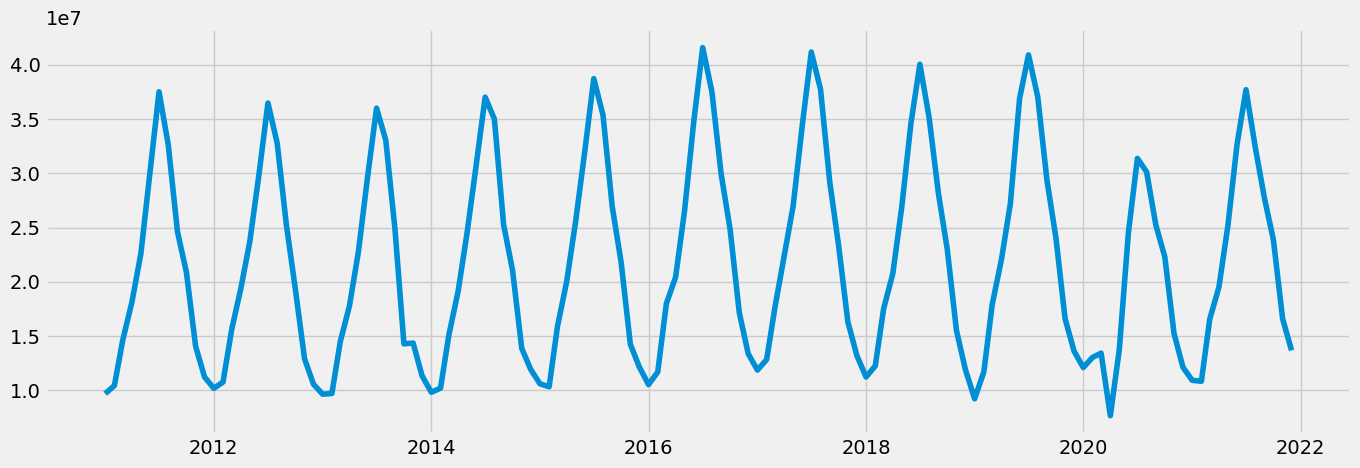

In [29]:
plt.figure(figsize=(15,5), dpi=100)

plt.plot(df_sub)

## 04. Time Series Analysis: Decomposition

In [31]:
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [32]:
from pylab import rcParams #fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

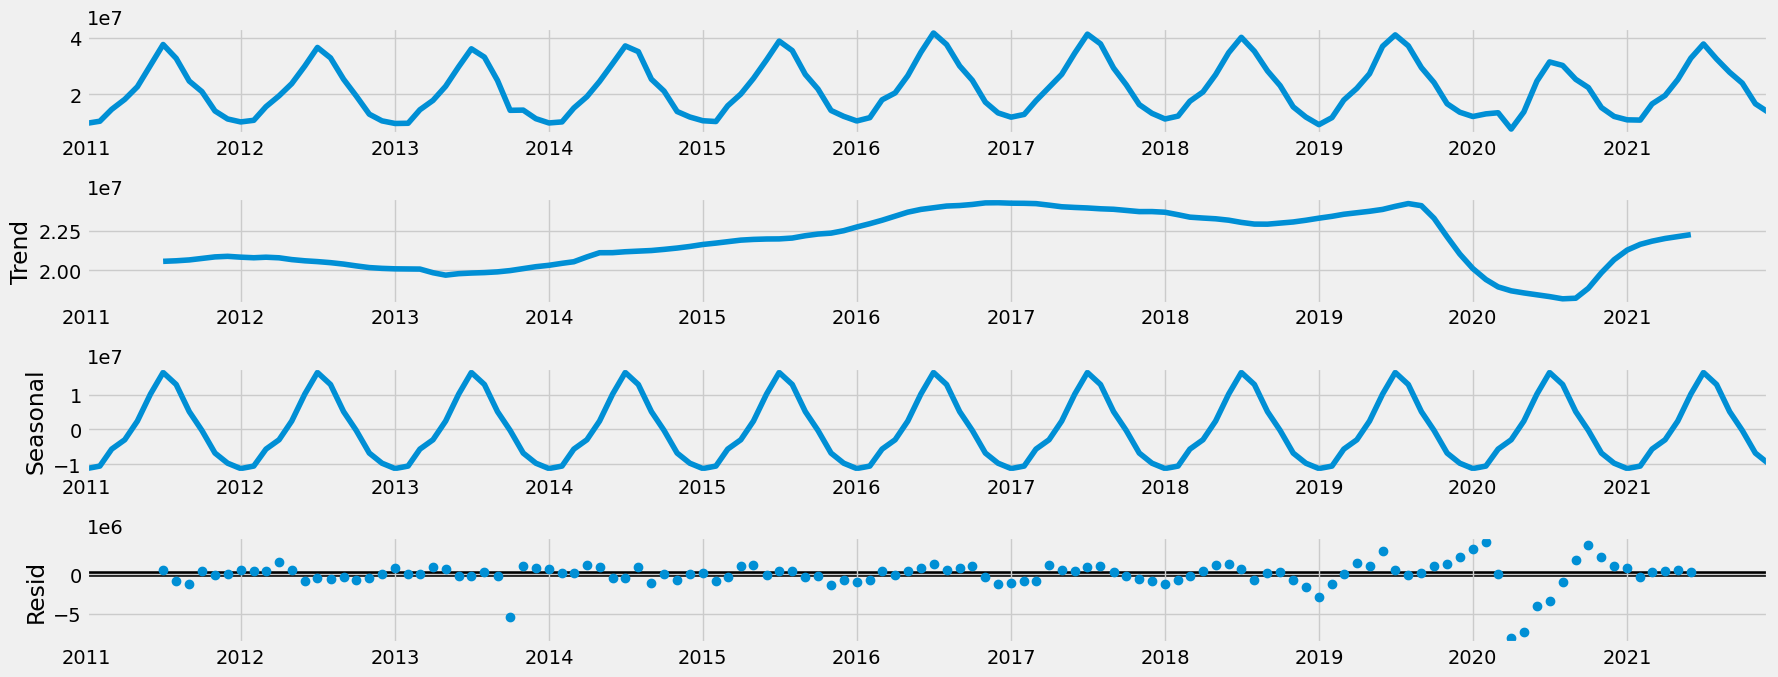

In [33]:
decomposition.plot()
plt.show()

Looking at the decomposition there are three immediate observations that I can make. 

1. The trend line helps show the impact of the COVID-19 Pandemic on the overall data. The data is trending positive, until 2020 when it makes a sharp drop and begins to recover in 2021.

2. There is heavy seasonality involved in visitation. This is most likely because recreation visits increase in the summer with nicer weather and students having additional time off. 

3. 2020 has lower visitation but, still has some visitation. The outdoor nature of National Parks likely contributed the the quick recovery of visitation data after the 2020 pandemic. 

## 05. Testing for Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(df_sub['Sum of Recreation Visits'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.472523
p-value                          0.122304
Number of Lags Used             12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


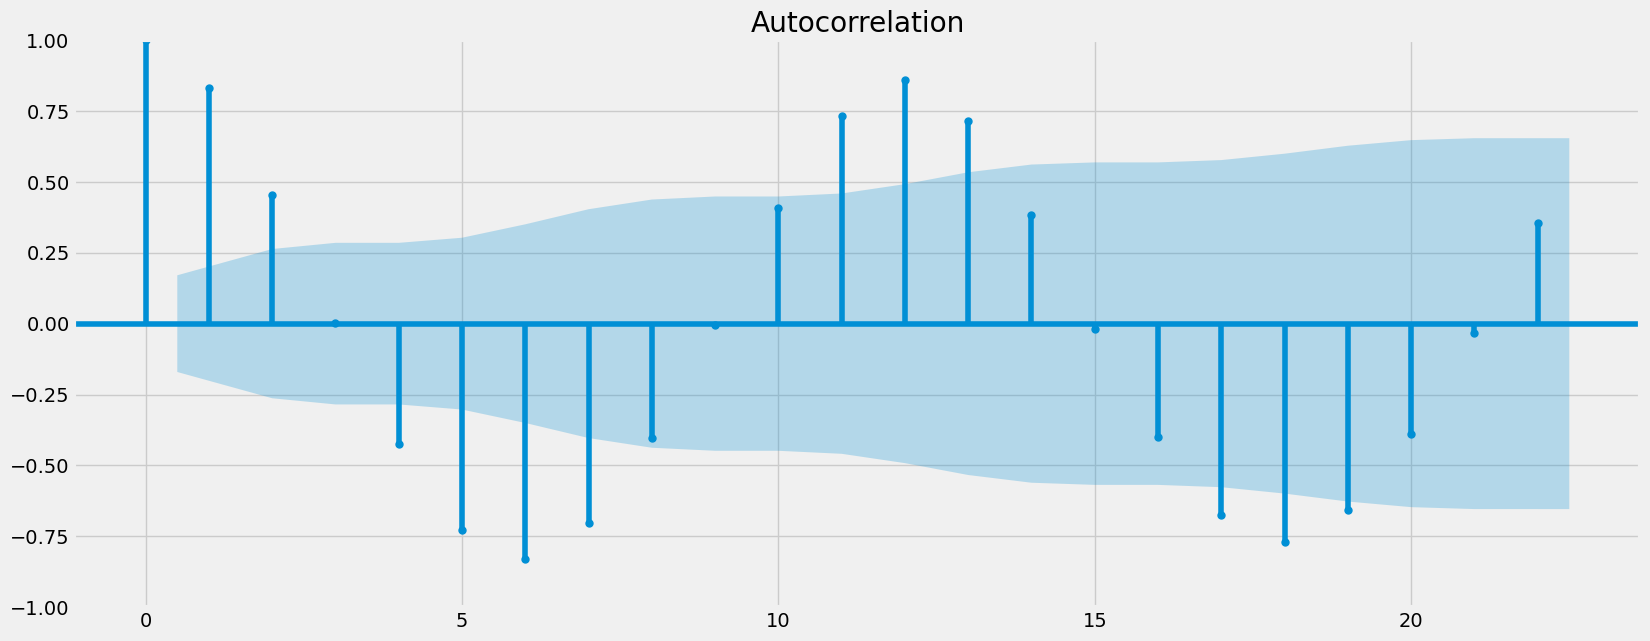

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

Data is non stationary, too many points are outside of the blue range to be stationary. 

## 06. Stationarizing the Data

In [37]:
df_sub_diff = df_sub - df_sub.shift(1)

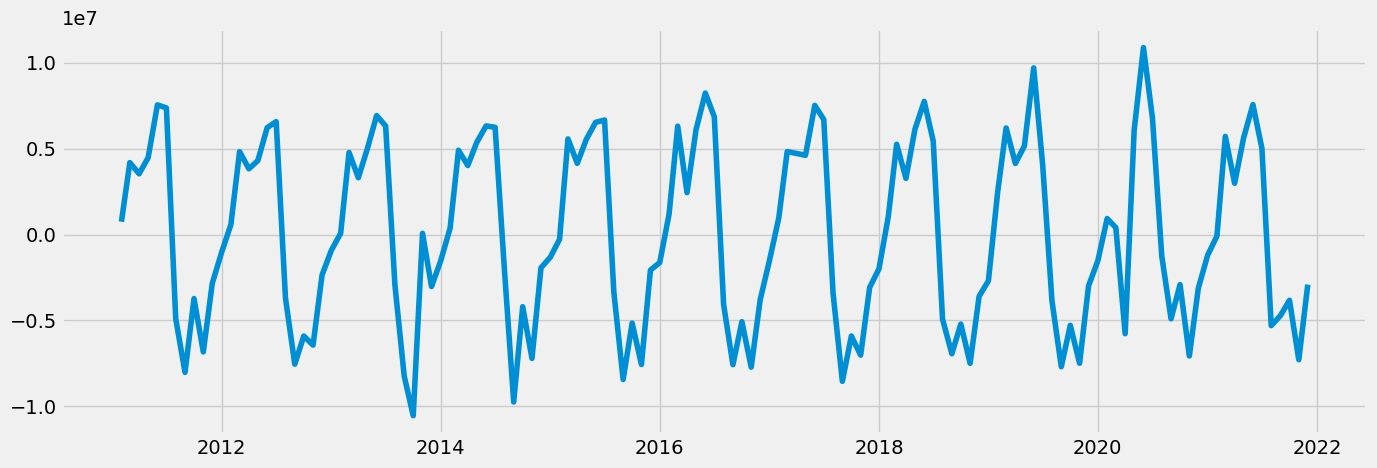

In [38]:
plt.figure(figsize=(15,5), dpi=100)

plt.plot(df_sub_diff)

In [41]:
df_sub_diff.isnull().sum()

Sum of Recreation Visits    1
dtype: int64

In [42]:
df_sub_diff.dropna(inplace = True)

In [43]:
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(df_sub_diff['Sum of Recreation Visits'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.724569
p-value                          0.003781
Number of Lags Used             11.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


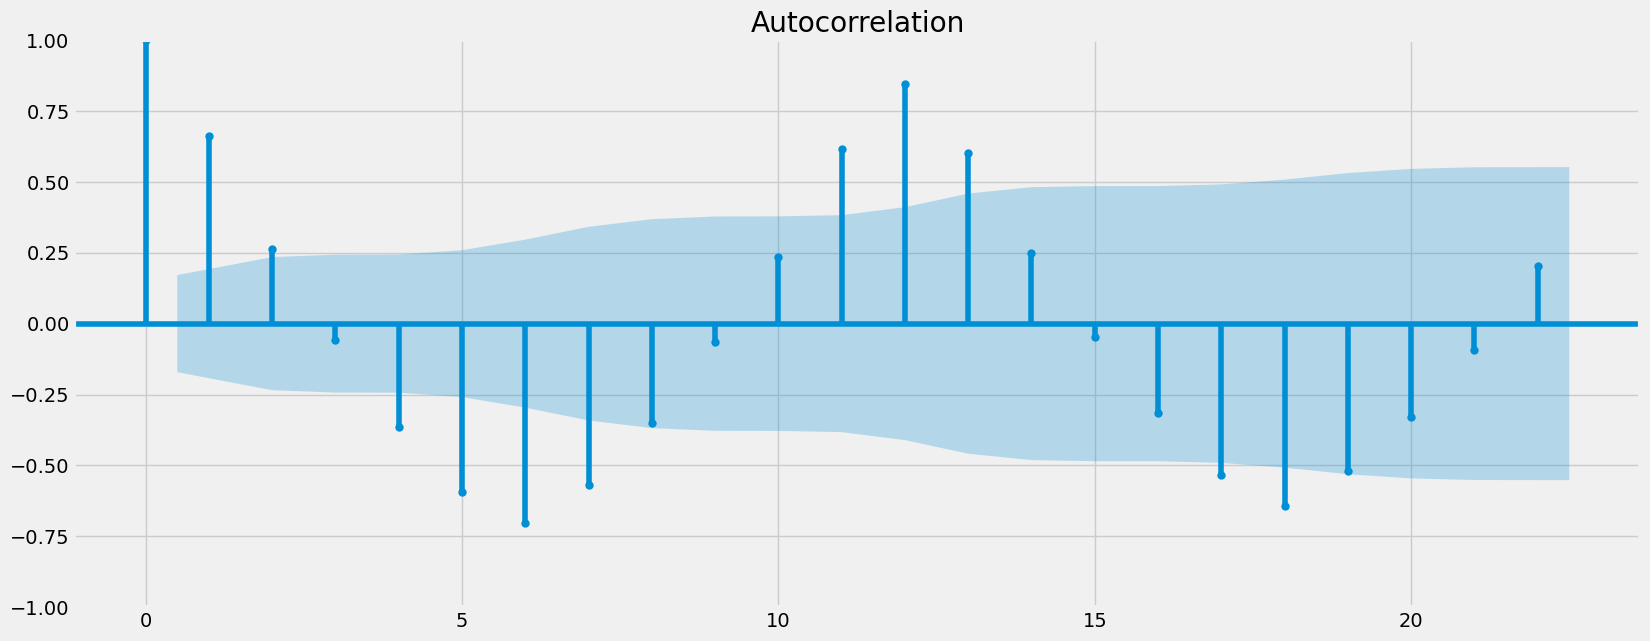

In [44]:
plot_acf(df_sub_diff)
plt.show()

There are 12 line outside of the blue space, so I must complete another round of stationarizing. 

In [45]:
df_sub_diff2 = df_sub_diff - df_sub_diff.shift(1)

In [46]:
df_sub_diff2.dropna(inplace = True)

In [47]:
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(df_sub_diff2['Sum of Recreation Visits'])

Dickey-Fuller Stationarity test:
Test Statistic                 -19.029945
p-value                          0.000000
Number of Lags Used             10.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


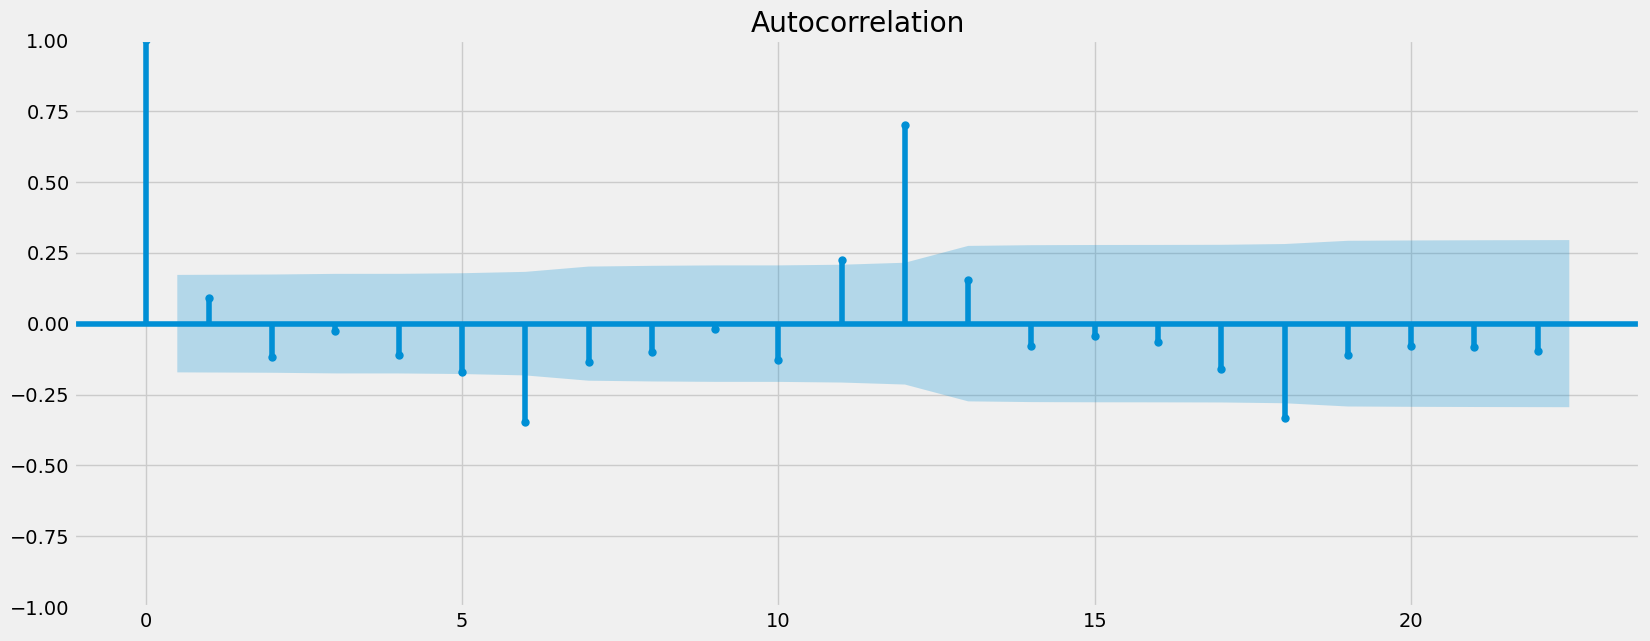

In [48]:
plot_acf(df_sub_diff2)
plt.show()

Only 5 bars are outside the acceptable range, so the data is sufficently stationary now. 